<a href="https://colab.research.google.com/github/KaushikDasarii/kaushik/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FOR CLEAR UNDERSTAND OF THE PCA**
[link text](https://chatgpt.com/s/t_68525771e1248191afe4f61768b98f9c)

**FOR REQUIRED FEATURES**

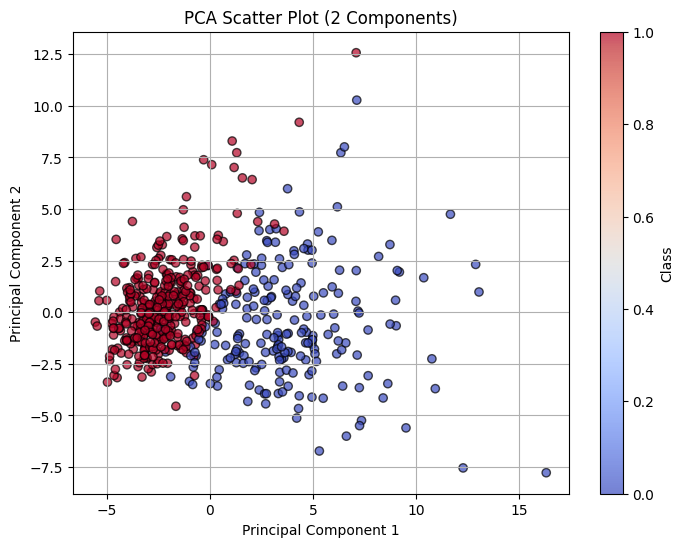


 BEFORE Hyperparameter Tuning:
Accuracy: 0.9649122807017544
Precision: 0.971830985915493
Recall: 0.971830985915493
F1 Score: 0.971830985915493
ROC AUC Score: 0.9950867998689813

 AFTER Hyperparameter Tuning:
Best Params: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
ROC AUC Score: 0.9963969865705863


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


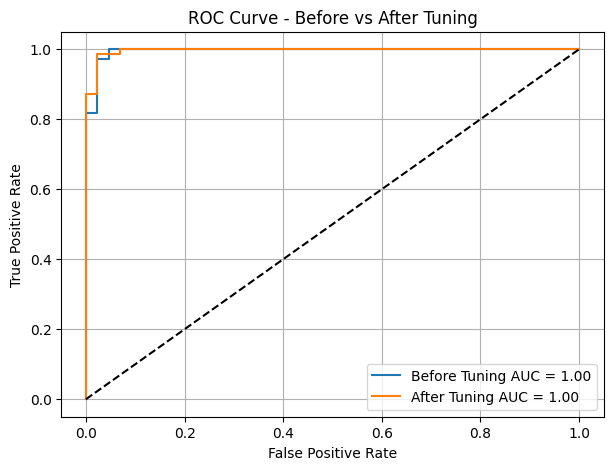


 Cross-Validated ROC AUC Score (5-Fold): 0.9852494163950108


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier

# -------------------------------
#  Replace this with your dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
# -------------------------------

# 1. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (2 Components)')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. XGBoost BEFORE tuning
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n BEFORE Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 6. GridSearchCV for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                    param_grid,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# 7. Evaluate the tuned model
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\n AFTER Hyperparameter Tuning:")
print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

# 8. ROC Curve
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(7, 5))
plt.plot(fpr1, tpr1, label="Before Tuning AUC = {:.2f}".format(roc_auc_score(y_test, y_proba)))
plt.plot(fpr2, tpr2, label="After Tuning AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_best)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Before vs After Tuning")
plt.legend()
plt.grid(True)
plt.show()

# 9. Cross-validation with best model
cv_scores = cross_val_score(best_model, X_pca, y, cv=5, scoring='roc_auc')
print("\n Cross-Validated ROC AUC Score (5-Fold):", cv_scores.mean())


**FOR REQUIRED VARAINCE**
**“I want PCA to keep enough components (new features) so that 95% of the important information (variance) in the original data is retained**


Easy Analogy
Imagine a school report card with 30 subjects (like 30 features in your dataset):

You want to summarize how well a student is doing.

But listing all 30 subjects is too long!

You find that just 10 of those subjects explain 95% of their overall performance.

So instead of using all 30, you keep just 10 — because those 10 give you almost the complete story.

That’s PCA(n_components=0.95):

You're keeping just enough new features to explain 95% of the total “performance” (variance) of the original data.

🧪 Technical Example (Real PCA)
Let’s say you have a dataset with 30 features.

You apply PCA and check how much information each new component carries:

Principal Component	% of Variance
PC1	40%
PC2	20%
PC3	15%
PC4	10%
PC5	5%
PC6 to PC30	10% total

Now you add up the first few:

PC1 + PC2 = 60%

PC1 + PC2 + PC3 = 75%

PC1 + PC2 + PC3 + PC4 + PC5 = 90%

PC1 to PC7 = 95%

✅ PCA will automatically choose the first 7 components, because that’s how many are needed to reach 95% variance.


Original features: 30 ➝ After PCA (95% variance): 10 features

📉 BEFORE Hyperparameter Tuning:
Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
ROC AUC Score: 0.9954143465443825


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 AFTER Hyperparameter Tuning:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
ROC AUC Score: 0.9954143465443825


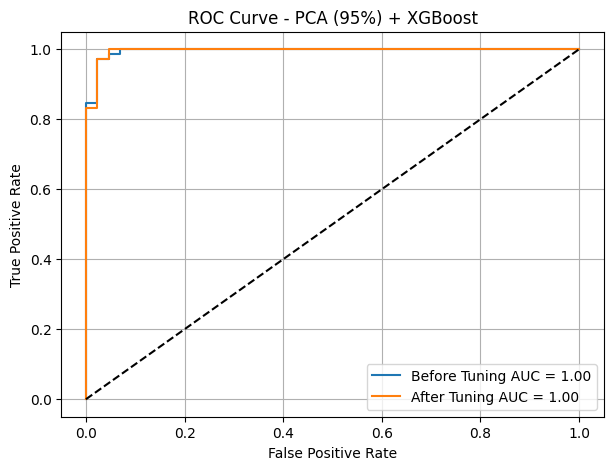

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Cross-Validated ROC AUC Score (5-Fold): 0.9910350344963842


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier

# -------------------------------
#  Replace this with your dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
# -------------------------------

# 1. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA keeping 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Original features: {X.shape[1]} ➝ After PCA (95% variance): {X_pca.shape[1]} features")

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 4. XGBoost BEFORE tuning
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n📉 BEFORE Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 5. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                    param_grid,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# 6. Evaluate the tuned model
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\n AFTER Hyperparameter Tuning:")
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

# 7. ROC Curve
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(7, 5))
plt.plot(fpr1, tpr1, label="Before Tuning AUC = {:.2f}".format(roc_auc_score(y_test, y_proba)))
plt.plot(fpr2, tpr2, label="After Tuning AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_best)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PCA (95%) + XGBoost")
plt.legend()
plt.grid(True)
plt.show()

# 8. Cross-validation with best model
cv_scores = cross_val_score(best_model, X_pca, y, cv=5, scoring='roc_auc')
print("\n Cross-Validated ROC AUC Score (5-Fold):", cv_scores.mean())



**USING A SINGLE PIPILINE**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📉 BEFORE Hyperparameter Tuning:
Accuracy: 0.9824561403508771
Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1 Score: 0.9859154929577465
ROC AUC Score: 0.9941041598427776


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 AFTER Hyperparameter Tuning:
Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
ROC AUC Score: 0.9944317065181788


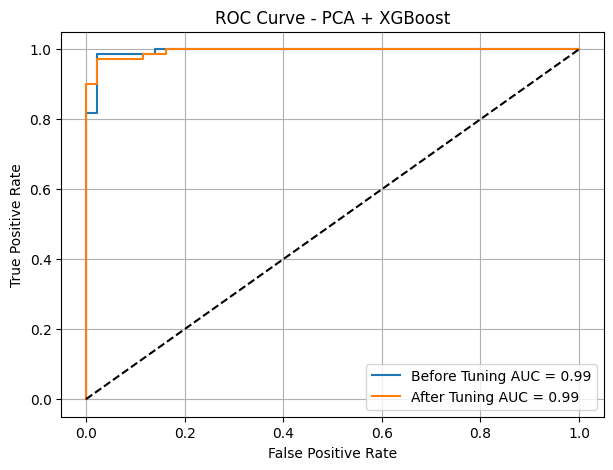

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Cross-Validated ROC AUC Score (5-Fold): 0.9909068103712715


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

def run_xgboost_with_pca_pipeline(X, y, pca_variance=0.95, test_size=0.2, random_state=42):
    """
    Runs a full pipeline: StandardScaler -> PCA -> XGBoost (with GridSearchCV), evaluates before & after tuning.
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Base pipeline (before tuning)
    base_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=pca_variance)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state))
    ])

    # Fit base pipeline
    base_pipeline.fit(X_train, y_train)
    y_pred = base_pipeline.predict(X_test)
    y_proba = base_pipeline.predict_proba(X_test)[:, 1]

    # Evaluation before tuning
    print("\n📉 BEFORE Hyperparameter Tuning:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

    # GridSearch for hyperparameter tuning
    param_grid = {
        'xgb__n_estimators': [50, 100],
        'xgb__max_depth': [3, 5],
        'xgb__learning_rate': [0.01, 0.1]
    }

    grid = GridSearchCV(base_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred_best = best_model.predict(X_test)
    y_proba_best = best_model.predict_proba(X_test)[:, 1]

    # Evaluation after tuning
    print("\n AFTER Hyperparameter Tuning:")
    print("Best Parameters:", grid.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred_best))
    print("Precision:", precision_score(y_test, y_pred_best))
    print("Recall:", recall_score(y_test, y_pred_best))
    print("F1 Score:", f1_score(y_test, y_pred_best))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

    # ROC Curve
    fpr1, tpr1, _ = roc_curve(y_test, y_proba)
    fpr2, tpr2, _ = roc_curve(y_test, y_proba_best)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr1, tpr1, label="Before Tuning AUC = {:.2f}".format(roc_auc_score(y_test, y_proba)))
    plt.plot(fpr2, tpr2, label="After Tuning AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_best)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - PCA + XGBoost")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Cross-validation with best model
    cv_score = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc').mean()
    print("\n Cross-Validated ROC AUC Score (5-Fold):", cv_score)

    return best_model
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Run the pipeline
model = run_xgboost_with_pca_pipeline(X, y, pca_variance=0.95)